Stress Intensity Factors II 
============================

```{image} ../LEFM/mode1.png
:alt: mode1
:width: 400px
:align: center
```


We will follow Williams's approach[^I1]. The boundary conditions of our problem are such that the crack faces will be traction free:

$$
\sigma_{\theta \theta} = \sigma_{r \theta} = 0 \ \ ; \ \ (\text{for} \ \ \theta=\pm \pi )
$$

Next, remembering that the stresses in polar coordinate are expressed as :
In polar coordinates, stresses are expressed as:

```{math}
:label: stress_ret
\begin{align*}
\sigma_{rr}& = \frac{1}{r^2} \frac{\partial^2 \Phi}{\partial \theta ^2} + \frac{1}{r}\frac{\partial \Phi}{\partial r}\\
\\
\tau_{r \theta}& = \frac{1}{r^2} \frac{\partial^2 \Phi}{\partial \theta \partial r} + \frac{1}{r^2}\frac{\partial \Phi}{\partial \theta} \\
\\
\sigma_{\theta \theta}& = \frac{\partial ^2 \Phi}{\partial r^2}
\end{align*}
```

The B.C leads to the requirement:

\begin{align*}
&\phi_{,rr} = 0 
&\left( \frac{1}{r}\phi_{,\theta}\right )_{,r} =0
\end{align*}

We know that $\phi$ will depend on both $r$ and $\theta$. For the sake of having shorter equations, we can start be defining $\psi$ such that:

$$
\nabla^2 \phi = \psi
$$
and since we are looking for a solution for the bi-harmonic problem $\nabla ^4 \phi =0$ we need to find $\psi$ that will satisfy 

$$
  \nabla ^2 \psi =0
$$ (psi2)

The following form will satisfy {eq}`psi2` :

$$
\psi = r^{\lambda -1}f(\theta) 
$$(psi_guess)

leading to

$$
\nabla^2\psi = r^{\lambda -3}[f(\theta)  (\lambda -1)^2+f^{''}(\theta)]=0
$$ (psi3)

Equation {eq}`psi3` is obviously satisfied for $r=0$ and $\lambda \geq 3$ otherwise, we must solve :

$$
(\lambda-1)^2f(\theta) +f^{''}(\theta) =0
$$ 

from which we can find that:

$$
f(\theta) = A\sin(\lambda -1) \theta + B\cos(\lambda -1) \theta
$$(f1)

plugging {eq}`f1` into {eq}`psi2` & {eq}`psi_guess` leads to :

$$
\nabla ^2 \psi =r^{\lambda -1}A\sin(\lambda -1) \theta + B\cos(\lambda -1) \theta
$$ (psifunc)

and finally $\phi$ assumes the form:

$$
 \phi(r,\theta) = r^{\lambda+1}[\frac{A}{4 \lambda} \cos ((\lambda-1) \theta) + \frac{B}{4 \lambda} \sin ((\lambda-1) \theta) +C \cos ((\lambda+1) \theta) + D \sin ((\lambda+1) \theta)] 
$$ (phi_1)

To find the coefficients in {eq}`phi_1` we will first write explicitly the stresses. 

To make our life easier (and to avoid stupid mistakes :) ) we will use the symbolic math python library [sympy](https://www.sympy.org/en/index.html)


In [1]:
#here we import the library
from sympy import *
init_printing(pretty_print=True, backcolor='Transparent',use_latex='png' ,fontsize='13pt', wrap_line=True,forecolor='Black')

Next, we will define the symbols we are using:

In [2]:
phi, A,B,C,D = symbols('phi A B C D')
L, r, theta = symbols('lambda r theta',real=True)

Since we are about to calculate the stresses using {eq}`stress_ret` it will be usefull to define the operators used for those calculations:

In [3]:
def Srr(phi,r,theta):
  return (phi.diff(r)/r + (1/r**2)*phi.diff(theta,2))

def Srt(phi,r,theta):
  phi_t =(1/r)*phi.diff(theta)   
  return -phi_t.diff(r)


def Stt(phi,r,theta):
  return phi.diff(r,2)

Ok, almost good to go, 

Next we need to define the function $\phi$ based on {eq}`phi_1` :

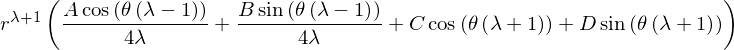

In [4]:
phi = r**(L+1) * ((A/4/L)*cos((L-1)*theta) + 
                  (B/4/L)*sin((L-1)*theta) + 
                  (C)    *cos((L+1)*theta) + 
                  (D)    *sin((L+1)*theta)  )
phi

Calculating the stresses is now a simple task:

In [5]:
sigma_rr = Srr(phi,r,theta)
sigma_rt = Srt(phi,r,theta)
sigma_tt = Stt(phi,r,theta)


And now $\sigma_{rr}$ is given by:

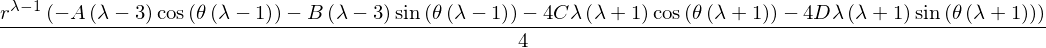

In [6]:
temp = sigma_rr*4/r**(L-1)
temp =((A*apart(temp,A).coeff(A) + B*apart(temp,B).coeff(B)+C*apart(temp,C).coeff(C)+D*apart(temp,D).coeff(D)))
(r**(L-1)/4)*simplify(temp)


$\sigma_{r\theta}$ by:

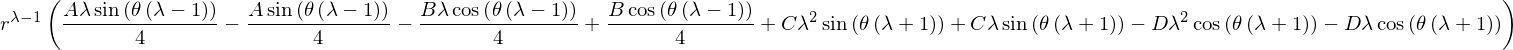

In [7]:
simplify(sigma_rt)

and $\sigma_{\theta \theta}$ 

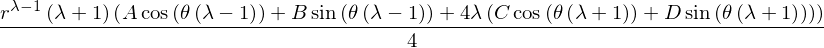

In [8]:
simplify(sigma_tt)

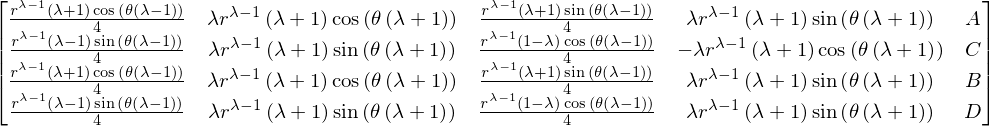

In [9]:
M = Matrix(([apart(sigma_tt,A).coeff(A), apart(sigma_tt,C).coeff(C), apart(sigma_tt,B).coeff(B), apart(sigma_tt,D).coeff(D),A],
           [apart(sigma_rt,A).coeff(A),apart(sigma_rt,C).coeff(C),  apart(sigma_rt,B).coeff(B), apart(sigma_rt,D).coeff(D),C],
           [apart(sigma_tt,A).coeff(A), apart(sigma_tt,C).coeff(C), apart(sigma_tt,B).coeff(B),apart(sigma_tt,D).coeff(D),B],
           [apart(sigma_rt,A).coeff(A), apart(sigma_rt,C).coeff(C), apart(sigma_rt,B).coeff(B),apart(sigma_tt,D).coeff(D),D]))
simplify(M)

The B.C, in conjuction with the stress expressions we have obtained can be written as a system of equations :

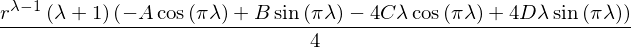

In [10]:
sigma_rtP = sigma_rt.subs(theta,pi)
sigma_rtN = sigma_rt.subs(theta,-pi)
sigma_ttP = sigma_tt.subs(theta,pi)
sigma_ttN = sigma_tt.subs(theta,-pi)

simplify_logic(sigma_ttN)

The solution we are looking for is of the form:

```{math}
:label: stress_BC
\begin{bmatrix} M \end{bmatrix}
\begin{bmatrix} A \\ B \\ C \\ D \end{bmatrix}
=\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
```

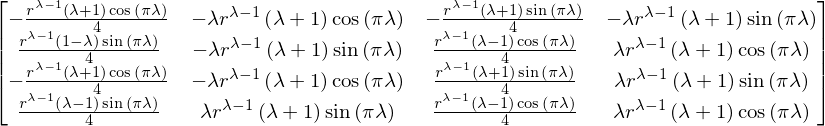

In [11]:
M = Matrix(([apart(sigma_ttP,A).coeff(A), apart(sigma_ttP,C).coeff(C),apart(sigma_ttP,B).coeff(B), apart(sigma_ttP,D).coeff(D)],
           [apart(sigma_rtP,A).coeff(A), apart(sigma_rtP,C).coeff(C),apart(sigma_rtP,B).coeff(B), apart(sigma_rtP,D).coeff(D)],
           [apart(sigma_ttN,A).coeff(A), apart(sigma_ttN,C).coeff(C),apart(sigma_ttN,B).coeff(B), apart(sigma_ttN,D).coeff(D)],
           [apart(sigma_rtN,A).coeff(A), apart(sigma_rtN,C).coeff(C),apart(sigma_rtN,B).coeff(B), apart(sigma_rtN,D).coeff(D)]))
simplify(M)

rearranging M such that :

M[0,:] = M[0,:]+M[2,:]

M[1,:] = M[1,:]+M[3,:]

M[2,:] = M[2,:]-M[0,:]

M[3,:] = M[3,:]-M[1,:]

We arrivae at:

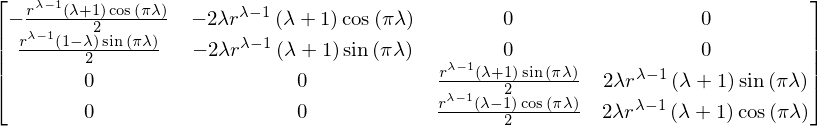

In [12]:
Ma = M.copy()

Ma[0,:] = M[0,:]+M[2,:]

Ma[1,:] = M[1,:]-M[3,:]

Ma[2,:] = M[2,:]-M[0,:]

Ma[3,:] = M[3,:]+M[1,:]

simplify(Ma)

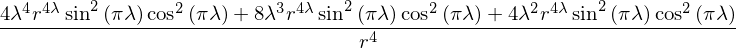

In [13]:
Ma.det()

for:

```{math}

\lambda = \frac{n}{2} \ \ ; \ \ -\infty < n < \infty

```


the detreminant is always zero 

We saw that the stress will behave as $r^{\lambda -1}$ and the strain will follow the same power law. 

This results in having the strain energy to be:

```{math}
:label: finiteE
\int\sigma\epsilon dA ~ \int r^{2 \lambda -2} dr d\theta ~r^{2 \lambda}
```

and for the energy to obtain a finite value we demand that $2 \lambda >0$  leading to $ n \geq 1$

LEt us now go row by row and look at the solutions for {**A, B, C, D}**

from the first row we obtain 

$$

C = -\frac{1}{4\lambda} A

$$

for $\lambda = 1,2,3....\infty$

From the seond row we obtain 


$$

C = \frac{1-\lambda}{4\lambda (1+\lambda)} A

$$

for $\lambda = \frac{1}{2},\frac{3}{2},\frac{5}{2}....\infty$

Similarly from the second bloc of **M** we obtain 

$$

D = -\frac{1}{4\lambda} B

$$

for $\lambda = \frac{1}{2},\frac{3}{2},\frac{5}{2}....\infty$


and


$$

D = \frac{1-\lambda}{4\lambda (1+\lambda)} B

$$

for $\lambda = 1,2,3....\infty$


From the above solutions it is clear that we have two sets of solutions 
one for for $\color{red}{\lambda = 1,2,3....\infty}$
for which 

$$
\color{red}{C = -\frac{1}{4\lambda} A \\
D = \frac{1-\lambda}{4\lambda (1+\lambda)} B 
}
$$


and one for $\color{blue}{\lambda = \frac{1}{2},\frac{3}{2},\frac{5}{2}....\infty}$

$$
\color{blue}{C = \frac{1-\lambda}{4\lambda (1+\lambda)} A \\
D = -\frac{1}{4\lambda} B
}
$$

```{image} ../LEFM/mode2.png
:alt: mode3
:width: 400px
:align: center
```


We can write to final solution as a superposition of the two such that 

```{math}
\sigma_{rr} = \color{blue}{\sigma_{rr}^a}+ \color{red}{\sigma_{rr}^b }\\
\sigma_{r\theta} = \color{blue}{\sigma_{r \theta}^a}+ \color{red}{\sigma_{r \theta}^b }\\
\sigma_{\theta \theta} = \color{blue}{\sigma_{\theta \theta}^a}+ \color{red}{\sigma_{\theta \theta}^b}
```

Looking for example at $\sigma_{rr}$ it now reads (up to n=4) :

$$
\sigma_{rr} = \color{blue}{\frac{r^{-1/2}}{4} \left( \frac{5}{2}\cos \frac{\theta}{2} - \frac{1}{2} \cos \frac{3 \theta}{2} \right ) A_0 ^a +\left( - \frac{5}{2}\sin \frac{\theta}{2} + \frac{3}{2} \sin \frac{3 \theta}{2} \right ) B_0^a   } \\ 
+ \color{red}{ \frac{1}{2} \left( 1+\cos 2 \theta \right)A_1 ^b } + \color{blue}{\frac{r^{1/2}}{4}  \left( \frac{3}{2}\cos \frac{\theta}{2} + \frac{1}{2} \cos \frac{5 \theta}{2} \right )\\
 A_1 ^a +\left(  \frac{3}{2}\sin \frac{\theta}{2} + \frac{5}{2} \sin \frac{5 \theta}{2} \right ) B_1 ^a   } \\
+ \color{red}{ \frac{r}{4} \left(\cos \theta+ 3 \cos 3 \theta  \right)A_2 ^b  + \left( \sin \theta + \sin 3 \theta \right ) B_2 ^b}
$$

Restricting ourselves now to  <span style="color:blue"> just one set of solutions such that $\lambda = \frac{1}{2}$ </span> we obtain:

```{math}
\color{blue}{\sigma_{rr} = \frac{r^{-1/2}}{4} \left( \frac{5}{2}\cos \frac{\theta}{2} - \frac{1}{2} \cos \frac{3 \theta}{2} \right ) A_0  +\left( - \frac{5}{2}\sin \frac{\theta}{2} + \frac{3}{2} \sin \frac{3 \theta}{2} \right ) B_0   } \\
\color{blue}{\sigma_{r \theta} = \frac{r^{-1/2}}{4} \left( \frac{1}{2}\sin \frac{\theta}{2} + \frac{1}{2} \sin \frac{3 \theta}{2} \right ) A_0  +\left( + \frac{1}{2}\cos \frac{\theta}{2} + \frac{3}{2} \cos \frac{3 \theta}{2} \right ) B_0   } \\
\color{blue}{\sigma_{\theta \theta} = \frac{r^{-1/2}}{4} \left( \frac{3}{2}\cos \frac{\theta}{2} + \frac{1}{2} \cos \frac{3 \theta}{2} \right ) A_0  -\left( \frac{3}{2}\sin \frac{\theta}{2} + \frac{3}{2} \sin \frac{3 \theta}{2} \right ) B_0   } \\
```

```{admonition} Finally
:class: tip

Substituting $\theta = 0$ we obtain :

> $\sigma_{\theta \theta}(r,0) = \frac{A_0}{2 \sqrt(r)}=\frac{K_{I}}{\sqrt{2 \pi r}}$ which leads us to the immediate conclusion that $A_0 = \sqrt{\frac{2}{\pi}}K_{I}$

and 

> $\sigma_{r\theta}(r,0) = \frac{B_0}{2 \sqrt(r)}=\frac{K_{II}}{\sqrt{2 \pi r}}$ which leads us to the immediate conclusion that $B_0 = \sqrt{\frac{2}{\pi}}K_{II}$
```


### Singular solution for mode I and II

The singular stresses calculated for mode I and mode II are now given by :

```{admonition} Mode I stresses

```{math}
&\sigma_{rr}(r,\theta) = \frac{K_I}{\sqrt{2 \pi r}} \left ( \frac{5}{4} \cos\frac{\theta}{2} - \frac{1}{4} \cos \frac{3 \theta}{2} \right ) \\
&\sigma_{r \theta}(r,\theta) = \frac{K_I}{\sqrt{2 \pi r}} \left ( \frac{1}{4} \sin\frac{\theta}{2} + \frac{1}{4} \sin \frac{3 \theta}{2} \right ) \\
&\sigma_{\theta \theta}(r,\theta) = \frac{K_I}{\sqrt{2 \pi r}} \left ( \frac{3}{4} \cos\frac{\theta}{2} + \frac{1}{4} \cos \frac{3 \theta}{2} \right )
```
```




```{admonition} Mode II stresses
```{math}
&\sigma_{rr}(r,\theta) = \frac{K_{II}}{\sqrt{2 \pi r}} \left ( -\frac{5}{4} \sin\frac{\theta}{2} + \frac{3}{4} \sin \frac{3 \theta}{2} \right ) \\
&\sigma_{r \theta}(r,\theta) = \frac{K_{II}}{\sqrt{2 \pi r}} \left ( \frac{1}{4} \cos\frac{\theta}{2} + \frac{3}{4} \cos \frac{3 \theta}{2} \right ) \\
&\sigma_{\theta \theta}(r,\theta) = -\frac{K_{II}}{\sqrt{2 \pi r}} \left ( \frac{3}{4} \sin\frac{\theta}{2} + \frac{3}{4} \sin \frac{3 \theta}{2} \right )
```
```

#### The singular displacement field (mode I&II)

The strains are found using the equations of elasticity (in this case for plane stress):

```{math}
&\epsilon_{rr} = \frac{1}{E} \left( \sigma_{rr} - \nu \sigma_{\theta \theta} \right ) \\
&\epsilon_{\theta \theta} = \frac{1}{E} \left( \sigma_{\theta  \theta} - \nu \sigma_{rr} \right ) \\
&\epsilon_{r \theta} = \frac{1+\nu}{E}\sigma_{r \theta}
```
and from there we can intgerate to obtain the displacements

```{math} 
:label: Ueps
&\epsilon_{rr} = \frac{\partial u_r}{\partial r} \\
&\epsilon_{r \theta} = \frac{1}{2} \left( \frac{1}{r} \frac{\partial u_r}{\partial \theta} + \frac{\partial u_{\theta}}{\partial r} - \frac{u_{\theta}}{r}  \right ) \\
&\epsilon_{\theta \theta} = \frac{u_r}{r} + \frac{1}{r} \frac{\partial u_{\theta}}{\partial\theta}
```




```{admonition} Mode I displacements (singular terms)

$$
u_r = \frac{K_I}{2E} \sqrt{\frac{r}{2 \pi}} \left [ (3 \nu - 5)\cos \frac{\theta}{2} + (\nu +1) \cos(\frac{3\theta}{2} \right ] \\
u_{\theta} = \frac{K_I}{2E} \sqrt{\frac{r}{2 \pi}} \left [ (\nu - 7) \sin \frac{\theta}{2} + (\nu +1) \sin(\frac{3\theta}{2} \right ] 
$$

```



```{admonition} Mode II displacements (singular terms)

$$
u_r = \frac{K_I}{2E} \sqrt{\frac{r}{2 \pi}} \left [ (3 \nu - 5)\sin \frac{\theta}{2} + 3(\nu +1) \sin (\frac{3\theta}{2} \right ] \\
u_{\theta} = \frac{K_I}{2E} \sqrt{\frac{r}{2 \pi}} \left [ (\nu - 7) \cos \frac{\theta}{2} + 3(\nu +1) \cos(\frac{3\theta}{2} \right ] 
$$
```

### What about mode III?


```{image} ../LEFM/mode3.png
:alt: mode3
:width: 400px
:align: center
```


> Im sure you will all be glad to know that mode III presents a much simpler solution. 

We will denote the displacements in the $x$ direction as $u$, $y$ direction as $v$ and $z$ direction as $w$.

Next, using polar coordinates, we need to find $w$ to satisfy :

```{math}
:label: mod31
\nabla ^2 w = w_{,rr} + \frac{1}{r}w_{,r}+\frac{1}{r^2}w_{,\theta \theta} =0
```
and the B.C (traction free crack surfaces)

```{math}
:label: mod3BC
w_{, \theta}(r,\theta \pm \pi)=0
```

Assuming the displacements can be written as a seperable function $w(r,\theta)=R(r)T(\theta)$.

Equation {eq}`mod31` now reads

```{math}
r^2\frac{R''}{R} + r\frac{R'}{R} = -\frac{T''}{T}= \left [ \begin{array}{@{}c@{}}
\lambda^2 \\ 0 \\ - \lambda^2 \end{array} \right ] 
```

A non trivial solution exist only for the case of $\lambda ^2$ and thus
```{math}
&T'' +\lambda ^2 = 0 \Rightarrow T(\theta) - A\cos \lambda \theta + B \sin \lambda \theta \\
&r^2 R`` + rR` - \lambda ^2 R = 0 \Rightarrow r^{\pm \lambda}
```
and {eq}`mod3BC` becomes :

```{math}
& \lambda \left ( -A \sin \lambda \pi + B \cos \lambda \pi \right ) =0 \\
& \lambda \left ( A \sin \lambda \pi + B \cos \lambda \pi \right ) =0
```
the above set of equations leads to two solutions:

```{math}
& B \lambda \cos \lambda \pi =0 \Rightarrow \lambda = 0, \pm \frac{1}{2},\pm \frac{3}{2},\pm \frac{5}{2}... \\
&A \lambda \sin \lambda \pi =0 \Rightarrow \lambda = 0, \pm 1, \pm 2, \pm 3 ...
```
and finally
```{admonition} 
$$
w(r,\theta) = \sum_{n=-\infty}^{n=\infty} A_nr^n \cos n \theta + B_n r^{n+ \frac{1}{2}} \sin \left ( \frac{1}{2}+n \right ) \theta
$$
```

$w(r,\theta) = \sum_{n=-\infty}^{n=\infty} A_nr^n \cos n \theta + B_n r^{n+ \frac{1}{2}} \sin \left ( \frac{1}{2}+n \right ) \theta$


The stresses are now readily available by taking the appropriate drivatives :

```{math}
\sigma_{3r} \mu \frac{\partial w}{\partial r} \ \ ; \ \ \sigma_{3 \theta} \frac{\mu}{r} \frac{\partial w}{\partial \theta}
```


As before, we demand that the strain energy will yiled a finite number. it is easy to show that for the limit of $r \to 0$ , i.e. as we approach the crack tip, the strain energy 

follow $r^{2 \lambda}$ and as before we require that $2 \lambda \geq 0$ leading to $n \geq 0 $

Taking a small shortcut we will define 

```{math}
K_{III} = B_0 \mu \sqrt{frac{\pi}{2}}
```

and after substitution:

```{admonition} mode III stress
```{math} 
&\sigma_{3r}(r,\theta) = \color{green}{\frac{K_III}{\sqrt {2 \pi r }} \sin \frac{\theta}{2}} + A1 \mu \cos \theta + \frac{3 B_2 \mu }{2} r^{\frac{1}{2}} \sin \frac{3 \theta}{2}... \\
&\sigma_{3 \theta}(r,\theta) = \color{green}{\frac{K_III}{\sqrt {2 \pi r }} \cos \frac{\theta}{2}} - A1 \mu \sin \theta + \frac{3 B_2 \mu }{2} r^{\frac{1}{2}} \cos \frac{3 \theta}{2}...
```
```

### Summary - stress field

So far, we have found the asymptotic solutions of the displacement and stress fields for the threee modes of fracture under linear elastic conditions:

```{tabbed} Mode I stresses
$$
 \sigma_{11} = \frac{K_I}{\sqrt{ 2 \pi r}} \left [ \cos \frac{\theta}{2} \left ( 1- \sin \frac{\theta}{2} \sin \frac{2\theta}{2} \right ) \right ] \\
 \sigma_{22} = \frac{K_I}{\sqrt{ 2 \pi r}} \left [ \cos \frac{\theta}{2} \left ( 1+ \sin \frac{\theta}{2} \sin \frac{2\theta}{2} \right ) \right ] \\
 \sigma_{12} = \frac{K_I}{\sqrt{ 2 \pi r}} \left [ \cos \frac{\theta}{2} \sin \frac{\theta}{2} \sin \frac{2\theta}{2} \right ]
$$
```

```{tabbed} Mode II stresses
$$
 \sigma_{11} =  \frac{K_II}{\sqrt{ 2 \pi r}} \left [ -\sin \frac{\theta}{2} \left ( 2+ \cos \frac{\theta}{2} \cos \frac{2\theta}{2} \right ) \right ] \\
 \sigma_{22} = \frac{K_II}{\sqrt{ 2 \pi r}} \left [ \sin \frac{\theta}{2} \cos \frac{\theta}{2} \cos \frac{2\theta}{2} \right ] \\
 \sigma_{12} = \frac{K_II}{\sqrt{ 2 \pi r}} \left [ \cos \frac{\theta}{2} \left ( 1- \sin \frac{\theta}{2} \sin \frac{2\theta}{2} \right ) \right ]
$$
```

```{tabbed} Mode III stresses
$$
 \sigma_{31} = -\frac{K_{III}}{\sqrt { 2 \pi r}} \sin \frac{\theta}{2} \\
 \sigma_{32} = \frac{K_{III}}{\sqrt { 2 \pi r}} \cos \frac{\theta}{2}
$$
```

### Summary - displacement field
```{tabbed} Mode I displacements
$$
 u_1 = \frac{K_I}{2 \mu} \sqrt{ \frac{r}{2 \pi}} \left [ \cos \frac{\theta}{2} \left ( \kappa -   \cos \theta \right ) \right ] \\
 u_2 = \frac{K_I}{2 \mu} \sqrt{ \frac{r}{2 \pi}} \left [ \sin \frac{\theta}{2} \left ( \kappa -  \cos \theta \right ) \right ] 
$$
```

```{tabbed} Mode II displacements
$$
 u_1 = \frac{K_II}{2 \mu} \sqrt{ \frac{r}{2 \pi}} \left [ \sin \frac{\theta}{2} \left ( \kappa -  + \cos \theta \right ) \right ] \\
 u_2 = \frac{K_II}{2 \mu} \sqrt{ \frac{r}{2 \pi}} \left [ - \cos \frac{\theta}{2} \left ( \kappa -2 + \cos \theta \right ) \right ] 
$$
```

```{tabbed} Mode III displacements
$$
u_{3} = \frac{K_{III}}{\mu} \sqrt{\fra{r}{2 \pi}} \sin \frac{\theta}{2}
$$
```